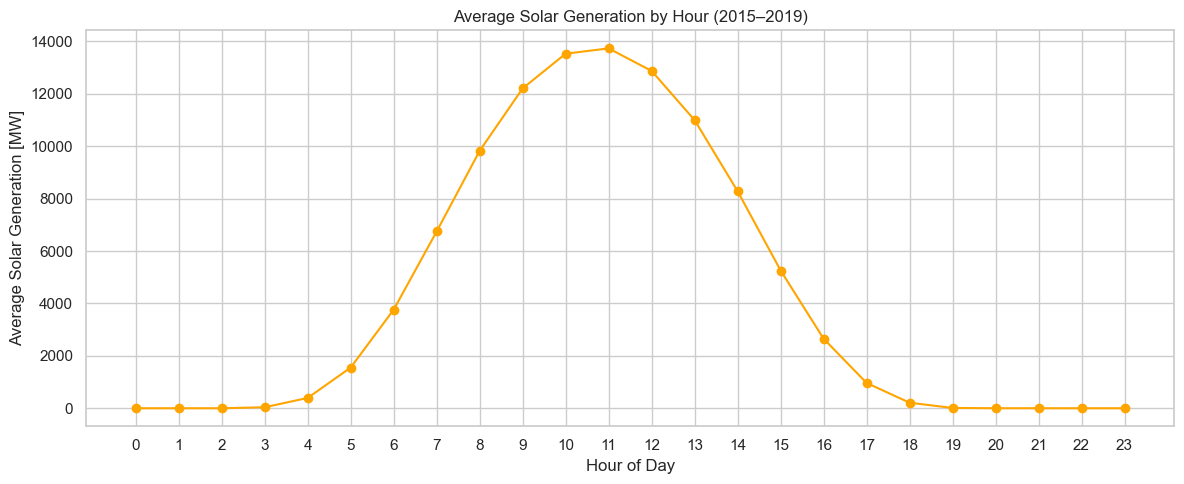

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the processed data
# Make sure the path to processed_data_de.csv is correct
df = pd.read_csv("../data/processed_data_de.csv", parse_dates=["utc_timestamp"])

# Set font and style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

# Plot 1: Average solar generation by hour of the day
solar_by_hour = df.groupby("hour")["DE_solar_generation_actual"].mean()

plt.plot(solar_by_hour.index, solar_by_hour.values, marker='o', color='orange')
plt.title("Average Solar Generation by Hour (2015–2019)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Solar Generation [MW]")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()






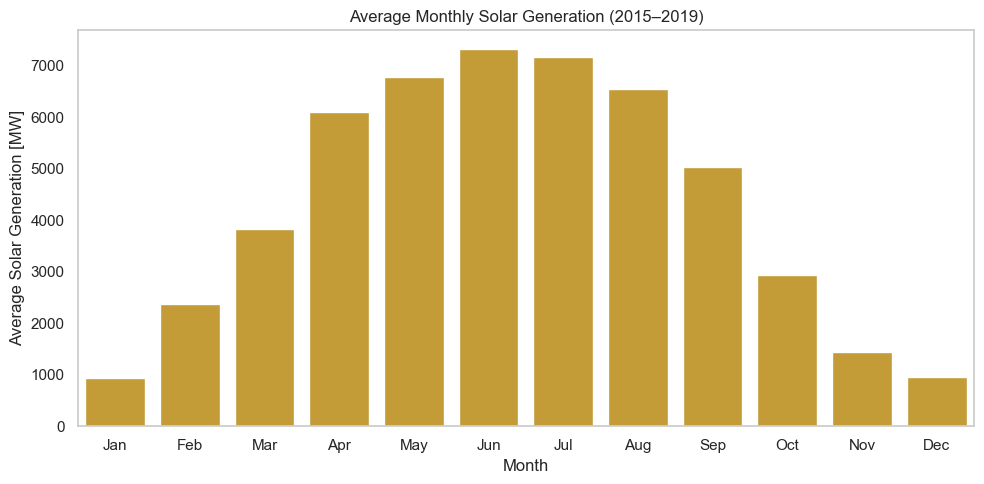

In [13]:
# Plot 2: Solarproduktion im Jahresverlauf (nach Monat)
# Gruppierung nach Monat und Mittelwertbildung
solar_by_month = df.groupby("month")["DE_solar_generation_actual"].mean()

# Darstellung
plt.figure(figsize=(10, 5))
sns.barplot(x=solar_by_month.index, y=solar_by_month.values, color="goldenrod")

plt.title("Average Monthly Solar Generation (2015–2019)")
plt.xlabel("Month")
plt.ylabel("Average Solar Generation [MW]")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(axis='y')
plt.tight_layout()
plt.show()
